In [2]:
import fredapi as fa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

fred = fa.Fred(api_key='instert your key here')

wti = fred.get_series('DCOILWTICO')
wti.name = "WTI"

In [3]:
wti.describe()

count    9429.000000
mean       46.366857
std        29.595579
min       -36.980000
25%        20.040000
50%        36.850000
75%        68.430000
max       145.310000
Name: WTI, dtype: float64

In [4]:
df = wti.to_frame()
df = df.reset_index()
df = df.rename(columns={"index": "ds", "WTI": "y"})

In [6]:
m = Prophet(daily_seasonality = True)
m.fit(df)

18:05:12 - cmdstanpy - INFO - Chain [1] start processing
18:05:14 - cmdstanpy - INFO - Chain [1] done processing


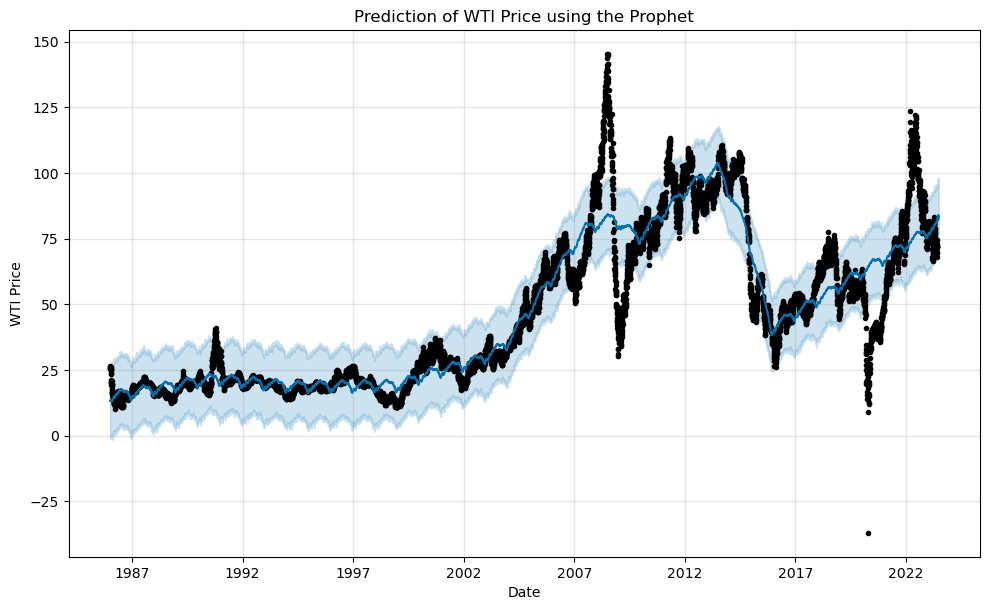

In [10]:
future = m.make_future_dataframe(periods=20)
prediction = m.predict(future)
m.plot(prediction)

plt.title("Prediction of WTI Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("WTI Price")
plt.show()

In [17]:
prediction[['ds', 'yhat', 'yhat_lower']].tail(20)

,ds,yhat,yhat_lower
9763,2023-06-06,81.744347,67.265093
9764,2023-06-07,81.774674,68.808961
9765,2023-06-08,81.903378,68.879881
9766,2023-06-09,81.934719,68.113106
9767,2023-06-10,83.304920,70.616387
9768,2023-06-11,83.343311,70.131241
9769,2023-06-12,81.923189,66.914199
9770,2023-06-13,81.992952,68.652142
9771,2023-06-14,82.040912,68.596866
9772,2023-06-15,82.186069,67.840833
